# 教学数据的Python实现

In [1]:
%matplotlib inline
# 数组
import numpy as np
# 生成稀疏矩阵 
from scipy.sparse import diags  
# 常微分方程 
from scipy.integrate import odeint, ode
# 线性代数法求本征值和本征矢
from scipy.sparse.linalg import eigs
from scipy.linalg import eig
# 傅里叶变换
from numpy.fft import fftfreq
from scipy.fftpack import *
# 有限差分数值导数和偏微分方程
from findiff import FinDiff
# 做图
import matplotlib.pyplot as plt


## diags法生成稀疏矩阵


In [32]:
diagonals = [[1,1,1,1], [1,2,3],[4,5]]
A_diag = diags(diagonals, [-4, 5, 6],shape=(8, 8)).toarray()

## eigs法求本征值和本征矢

求矩阵A的k个特征值和特征矢

`scipy.sparse.linalg.eigs(A, k=6, M=None, sigma=None, which='LM', v0=None, ncv=None, maxiter=None, tol=0, return_eigenvectors=True, Minv=None, OPinv=None, OPpart=None)`

In [33]:
A_unit= np.eye(8)
eigenval, eigenvec = eigs(A_unit,k=6)

In [34]:
eigenval.real

array([1., 1., 1., 1., 1., 1.])

In [35]:
eigenval, eigenvec = eigs(A_diag,k=6)

In [36]:
eigenval

array([-0.01195917+0.00496435j, -0.01195917-0.00496435j,
       -0.00492849+0.01195851j, -0.00492849-0.01195851j,
        0.00496278+0.01192424j,  0.00496278-0.01192424j])

## 空间与函数的离散化


In [37]:
x = np.linspace(-1, 1, 100)
f = np.sin(x)  # as an example

## FinDiff求导数

FinDiff(axis, spacing, degree)

In [3]:
x = np.linspace(-np.pi, np.pi, 100)
dx = x[1]-x[0]
f = np.sin(x)  # as an example

# Define the derivative:
d_dx = FinDiff(0, dx, 1, acc=4)
d2_dx2 = FinDiff(0, dx, 2, acc=6)

# Apply it:
df_dx = d_dx(f)
d2f_dx2 = d2_dx2(f)

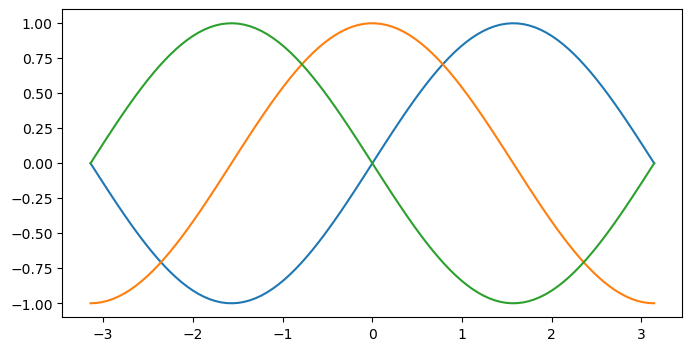

In [4]:
fig = plt.figure(figsize=(8,4), dpi=100)
plt.plot(x,f,x,df_dx,x,d2f_dx2)
plt.show()


## 解一维谐振子

定态薛定谔方程
$$ \hat{H}\Psi = E \Psi $$
这是哈密顿量的本征方程
$$ \begin{aligned}
    H &= T + V \\ 
    &= - \frac{\hbar ^2}{2 m} \frac{\partial ^2 }{\partial x^2 } + \frac{1}{2} \omega ^2 x^2
\end{aligned} $$



In [5]:
x = np.linspace(-6, 6, 201)
dx = x[1]-x[0]
d2_dx2 = FinDiff(0, dx, 2)

hbar = 1
m = 1 
omega = 1 
H = -hbar**2/(2*m)*d2_dx2.matrix(x.shape) + diags(1/2*omega*x**2)

[0.5 1.5 2.5 3.5 4.5]


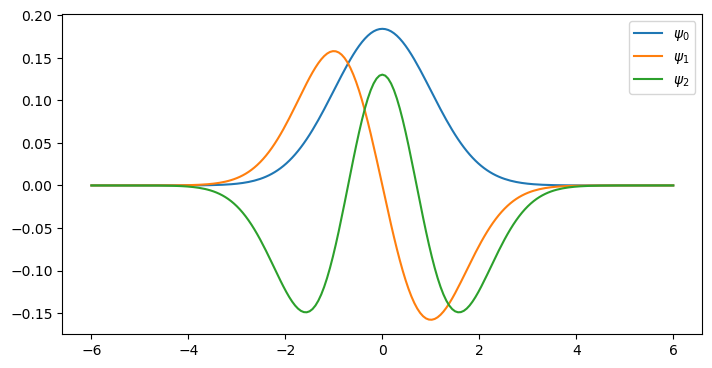

In [7]:
eigenval, eigenvec = eigs(H,k=10,which='SR')
print(np.around(eigenval[:5].real, 2))

fig = plt.figure(figsize=(8,4), dpi=100)
axes = fig.add_axes([0.0, 0.0, 0.8, 0.8]) 
axes.plot(x,eigenvec[:,0].real, label="$\psi_0$")
axes.plot(x,eigenvec[:,1].real, label="$\psi_1$")
axes.plot(x,eigenvec[:,2].real, label="$\psi_2$")
axes.legend()
plt.show()
#fig.savefig("EM/EM-beamer/figs/qm-harmonic-oscillator.svg")


## 阻尼振子

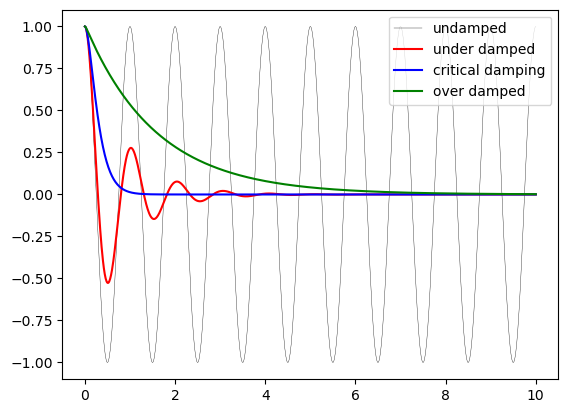

In [8]:
def dy(y, t, zeta, w0):
    """
    The right-hand side of the damped oscillator ODE
    """
    x, p = y[0], y[1]
    
    dx = p
    dp = -2 * zeta * w0 * p - w0**2 * x

    return [dx, dp]
# initial state: 
y0 = [1.0, 0.0]

# time coodinate to solve the ODE for
t = np.linspace(0, 10, 1000)
w0 = 2*np.pi*1.0

# solve the ODE problem for three different values of the damping ratio

y1 = odeint(dy, y0, t, args=(0.0, w0)) # undamped
y2 = odeint(dy, y0, t, args=(0.2, w0)) # under damped
y3 = odeint(dy, y0, t, args=(1.0, w0)) # critial damping
y4 = odeint(dy, y0, t, args=(5.0, w0)) # over damped

fig, ax = plt.subplots()
ax.plot(t, y1[:,0], 'k', label="undamped", linewidth=0.25)
ax.plot(t, y2[:,0], 'r', label="under damped")
ax.plot(t, y3[:,0], 'b', label=r"critical damping")
ax.plot(t, y4[:,0], 'g', label="over damped")
ax.legend(loc=1);
# fig.savefig("EM/EM-beamer/figs/damped.svg")

# Fourier transform

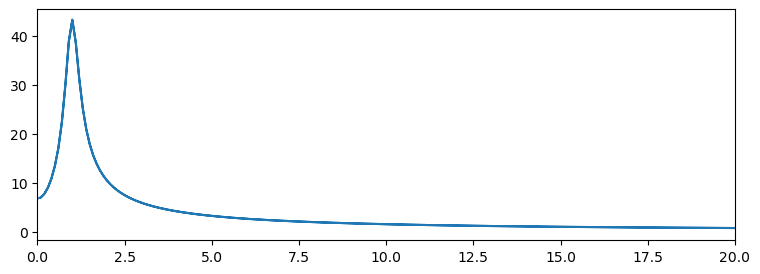

In [9]:
from numpy.fft import fftfreq
from scipy.fftpack import *

N = len(t)
dt = t[1]-t[0]

# calculate the fast fourier transform
# y2 is the solution to the under-damped oscillator from the previous section
F = fft(y2[:,0]) 
# F = fft(y1) 

# calculate the frequencies for the components in F
w = fftfreq(N, dt)

indices = np.where(w > 0) # select only indices for elements that corresponds to positive frequencies
w_pos = w[indices]
F_pos = F[indices]

fig, ax = plt.subplots(figsize=(9,3))
ax.plot(abs(w), abs(F));
ax.set_xlim(0, 20);

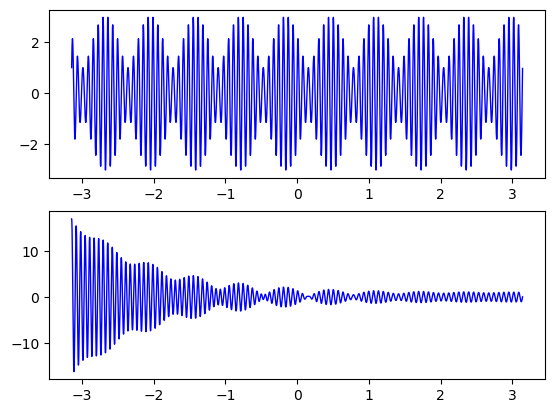

In [4]:
import numpy as np
import matplotlib.pyplot as plt
ax1 =plt.subplot(211)
ax2 =plt.subplot(212)
x = np.arange(- np.pi, np.pi, 0.001)
y1 = np.cos(x*100)+ 2*np.sin(x*90)
y2 = np.exp(-0.9*x)*np.cos(x*100)+ np.sin(x*90)

ax1.plot(x, y1, linewidth=1.0, color='b')
ax2.plot(x, y2, linewidth=1.0, color='b')
#plt.savefig("EM/EM-beamer/figs/my.svg")
plt.show();

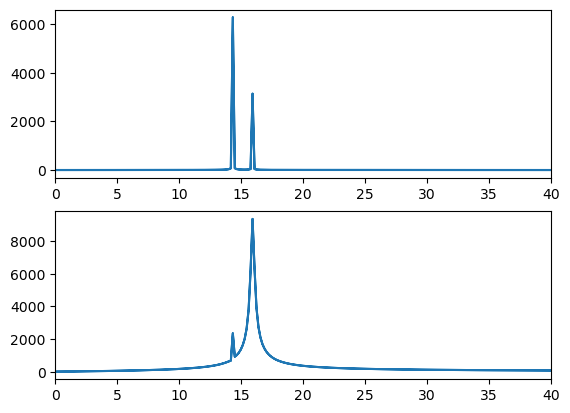

In [7]:
from numpy.fft import fftfreq
from scipy.fftpack import *

N = len(x)
dt = x[1]-x[0]

# calculate the fast fourier transform
# y2 is the solution to the under-damped oscillator from the previous section
# F = fft(y2[:,0]) 
F1 = fft(y1) 
F2 = fft(y2) 

# calculate the frequencies for the components in F
w = fftfreq(N, dt)

ax1 =plt.subplot(211)
ax2 =plt.subplot(212)

ax1.plot(abs(w), abs(F1));
ax1.set_xlim(0, 40);
ax2.plot(abs(w), abs(F2));
ax2.set_xlim(0, 40);

#plt.savefig("EM/EM-beamer/figs/fft.svg")

Text(1.6, 0.5, '$r$')

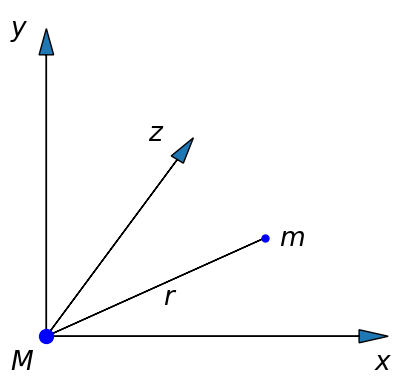

In [8]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(5,4.5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.set_xticks([])
ax.set_yticks([])
ax.spines[:].set_visible(False)

plt.xlim(-0.5,5)
plt.ylim(-0.5,5)

ax.arrow(0, 0, 0, 4.3, head_width = 0.2, head_length = 0.4)
ax.text(-0.5, 4.6, r"$y$", fontsize=19)

ax.arrow(0, 0, 4.3, 0, head_width = 0.2, head_length = 0.4)
ax.text(4.5, -0.5, r"$x$", fontsize=19)

ax.arrow(0, 0, 1.8, 2.7,  head_width = 0.2, head_length = 0.4)
ax.text(1.4, 3.0, r"$z$", fontsize=19)


plt.plot(3.0,1.5, 'b', marker = "o",markersize=5)
ax.text(3.2,1.4, r"$m$", fontsize=19)
plt.plot(0,0, 'b', marker = "o",markersize=10)
ax.text(-0.5,-0.5, r"$M$", fontsize=19)

ax.arrow(0, 0, 3.0,1.5)
ax.text(1.6, 0.5, r"$r$", fontsize=19)

#plt.savefig("EM/EM-beamer/figs/my2.svg")

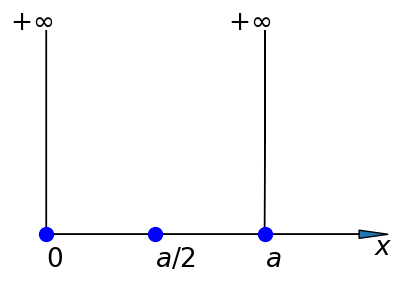

In [2]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(5,4.5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.5])
ax.set_xticks([])
ax.set_yticks([])
ax.spines[:].set_visible(False)

plt.xlim(-0.5,5)
plt.ylim(-0.5,5)

#ax.arrow(0, 0, 0, 4.3, head_width = 0.2, head_length = 0.4)
#ax.text(-0.5, 4.6, r"$y'$", fontsize=19)

ax.arrow(3, 0, 3, 2000, head_width = 0.2, head_length = 0.4)
ax.text(2.5, 5, r"$+\infty$", fontsize=19)
ax.arrow(0, 0, 0, 2000, head_width = 0.2, head_length = 0.4)
ax.text(-0.5, 5, r"$+\infty$", fontsize=19)

ax.arrow(0, 0, 4.3, 0, head_width = 0.2, head_length = 0.4)
ax.text(4.5, -0.5, r"$x$", fontsize=19)




plt.plot(1.5, 0, 'b', marker = "o",markersize=10)
ax.text(1.5,-0.8, r"$a/2$", fontsize=19)
plt.plot(3, 0, 'b', marker = "o",markersize=10)
ax.text(3,-0.8, r"$a$", fontsize=19)
plt.plot(0,0, 'b', marker = "o",markersize=10)
ax.text(0,-0.8, r"$0$", fontsize=19);

plt.savefig("EM/EM-beamer/figs/square-potential-well.svg")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


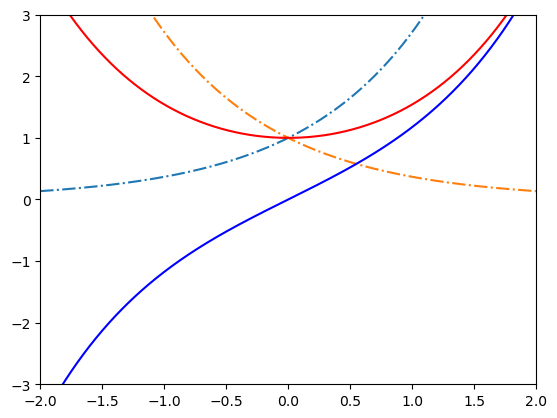

In [2]:
x = np.arange(- 2, 2, 0.001)
plt.plot(x, np.exp(x), '-.',label=r"$e^x$")
plt.plot(x, np.exp(-x), '-.',label=r"$e^{-x}$")
plt.plot(x, np.cosh(x),'r',label=r"$cosh(x)$")
plt.plot(x, np.sinh(x),'b',label=r"$sinh(x)$")

plt.xlim(-2,2)
plt.ylim(-3,3)
ax.arrow(0, 0, 0, 3)
ax.arrow(0, 0, 0, -3)
ax.arrow(0, 0, 2, 0)
ax.arrow(0, 0, -2, 0)

ax.legend();

# plt.savefig("EM/EM-beamer/figs/my3.svg")

## 任意势垒（动画）

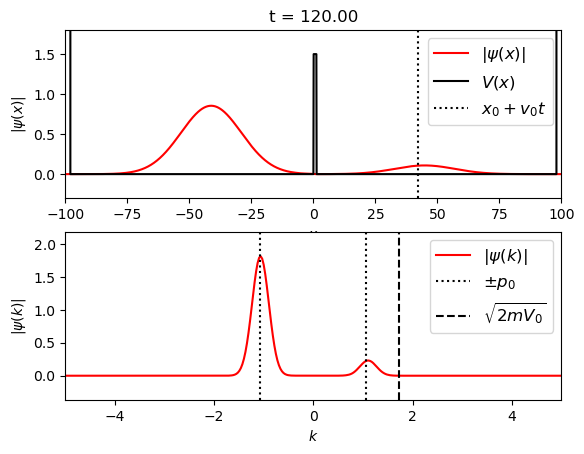

In [3]:
"""
General Numerical Solver for the 1D Time-Dependent Schrodinger's equation.

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""

import numpy as np
from matplotlib import pyplot as pl
from matplotlib import animation
from scipy.fftpack import fft,ifft


class Schrodinger(object):
    """
    Class which implements a numerical solution of the time-dependent
    Schrodinger equation for an arbitrary potential
    """
    def __init__(self, x, psi_x0, V_x,
                 k0 = None, hbar=1, m=1, t0=0.0):
        """
        Parameters
        ----------
        x : array_like, float
            length-N array of evenly spaced spatial coordinates
        psi_x0 : array_like, complex
            length-N array of the initial wave function at time t0
        V_x : array_like, float
             length-N array giving the potential at each x
        k0 : float
            the minimum value of k.  Note that, because of the workings of the
            fast fourier transform, the momentum wave-number will be defined
            in the range
              k0 < k < 2*pi / dx
            where dx = x[1]-x[0].  If you expect nonzero momentum outside this
            range, you must modify the inputs accordingly.  If not specified,
            k0 will be calculated such that the range is [-k0,k0]
        hbar : float
            value of planck's constant (default = 1)
        m : float
            particle mass (default = 1)
        t0 : float
            initial tile (default = 0)
        """
        # Validation of array inputs
        self.x, psi_x0, self.V_x = map(np.asarray, (x, psi_x0, V_x))
        N = self.x.size
        assert self.x.shape == (N,)
        assert psi_x0.shape == (N,)
        assert self.V_x.shape == (N,)

        # Set internal parameters
        self.hbar = hbar
        self.m = m
        self.t = t0
        self.dt_ = None
        self.N = len(x)
        self.dx = self.x[1] - self.x[0]
        self.dk = 2 * np.pi / (self.N * self.dx)

        # set momentum scale
        if k0 == None:
            self.k0 = -0.5 * self.N * self.dk
        else:
            self.k0 = k0
        self.k = self.k0 + self.dk * np.arange(self.N)

        self.psi_x = psi_x0
        self.compute_k_from_x()

        # variables which hold steps in evolution of the
        self.x_evolve_half = None
        self.x_evolve = None
        self.k_evolve = None

        # attributes used for dynamic plotting
        self.psi_x_line = None
        self.psi_k_line = None
        self.V_x_line = None

    def _set_psi_x(self, psi_x):
        self.psi_mod_x = (psi_x * np.exp(-1j * self.k[0] * self.x)
                          * self.dx / np.sqrt(2 * np.pi))

    def _get_psi_x(self):
        return (self.psi_mod_x * np.exp(1j * self.k[0] * self.x)
                * np.sqrt(2 * np.pi) / self.dx)

    def _set_psi_k(self, psi_k):
        self.psi_mod_k = psi_k * np.exp(1j * self.x[0]
                                        * self.dk * np.arange(self.N))

    def _get_psi_k(self):
        return self.psi_mod_k * np.exp(-1j * self.x[0] * 
                                        self.dk * np.arange(self.N))
    
    def _get_dt(self):
        return self.dt_

    def _set_dt(self, dt):
        if dt != self.dt_:
            self.dt_ = dt
            self.x_evolve_half = np.exp(-0.5 * 1j * self.V_x
                                         / self.hbar * dt )
            self.x_evolve = self.x_evolve_half * self.x_evolve_half
            self.k_evolve = np.exp(-0.5 * 1j * self.hbar /
                                    self.m * (self.k * self.k) * dt)
    
    psi_x = property(_get_psi_x, _set_psi_x)
    psi_k = property(_get_psi_k, _set_psi_k)
    dt = property(_get_dt, _set_dt)

    def compute_k_from_x(self):
        self.psi_mod_k = fft(self.psi_mod_x)

    def compute_x_from_k(self):
        self.psi_mod_x = ifft(self.psi_mod_k)

    def time_step(self, dt, Nsteps = 1):
        """
        Perform a series of time-steps via the time-dependent
        Schrodinger Equation.

        Parameters
        ----------
        dt : float
            the small time interval over which to integrate
        Nsteps : float, optional
            the number of intervals to compute.  The total change
            in time at the end of this method will be dt * Nsteps.
            default is N = 1
        """
        self.dt = dt

        if Nsteps > 0:
            self.psi_mod_x *= self.x_evolve_half

        for i in range(Nsteps - 1):
            self.compute_k_from_x()
            self.psi_mod_k *= self.k_evolve
            self.compute_x_from_k()
            self.psi_mod_x *= self.x_evolve

        self.compute_k_from_x()
        self.psi_mod_k *= self.k_evolve

        self.compute_x_from_k()
        self.psi_mod_x *= self.x_evolve_half

        self.compute_k_from_x()

        self.t += dt * Nsteps


######################################################################
# Helper functions for gaussian wave-packets

def gauss_x(x, a, x0, k0):
    """
    a gaussian wave packet of width a, centered at x0, with momentum k0
    """ 
    return ((a * np.sqrt(np.pi)) ** (-0.5)
            * np.exp(-0.5 * ((x - x0) * 1. / a) ** 2 + 1j * x * k0))

def gauss_k(k,a,x0,k0):
    """
    analytical fourier transform of gauss_x(x), above
    """
    return ((a / np.sqrt(np.pi))**0.5
            * np.exp(-0.5 * (a * (k - k0)) ** 2 - 1j * (k - k0) * x0))


######################################################################
# Utility functions for running the animation

def theta(x):
    """
    theta function :
      returns 0 if x<=0, and 1 if x>0
    """
    x = np.asarray(x)
    y = np.zeros(x.shape)
    y[x > 0] = 1.0
    return y

def square_barrier(x, width, height):
    return height * (theta(x) - theta(x - width))

######################################################################
# Create the animation

# specify time steps and duration
dt = 0.01
N_steps = 50
t_max = 120
frames = int(t_max / float(N_steps * dt))

# specify constants
hbar = 1.0   # planck's constant
m = 1.9      # particle mass

# specify range in x coordinate
N = 2 ** 11
dx = 0.1
x = dx * (np.arange(N) - 0.5 * N)

# specify potential
V0 = 1.5
L = hbar / np.sqrt(2 * m * V0)
a = 3 * L
x0 = -60 * L
V_x = square_barrier(x, a, V0)
V_x[x < -98] = 1E6
V_x[x > 98] = 1E6

# specify initial momentum and quantities derived from it
p0 = np.sqrt(2 * m * 0.2 * V0)
dp2 = p0 * p0 * 1./80
d = hbar / np.sqrt(2 * dp2)

k0 = p0 / hbar
v0 = p0 / m
psi_x0 = gauss_x(x, d, x0, k0)

# define the Schrodinger object which performs the calculations
S = Schrodinger(x=x,
                psi_x0=psi_x0,
                V_x=V_x,
                hbar=hbar,
                m=m,
                k0=-28)

######################################################################
# Set up plot
fig = pl.figure()

# plotting limits
xlim = (-100, 100)
klim = (-5, 5)

# top axes show the x-space data
ymin = 0
ymax = V0
ax1 = fig.add_subplot(211, xlim=xlim,
                      ylim=(ymin - 0.2 * (ymax - ymin),
                            ymax + 0.2 * (ymax - ymin)))
psi_x_line, = ax1.plot([], [], c='r', label=r'$|\psi(x)|$')
V_x_line, = ax1.plot([], [], c='k', label=r'$V(x)$')
center_line = ax1.axvline(0, c='k', ls=':',
                          label = r"$x_0 + v_0t$")

title = ax1.set_title("")
ax1.legend(prop=dict(size=12))
ax1.set_xlabel('$x$')
ax1.set_ylabel(r'$|\psi(x)|$')

# bottom axes show the k-space data
ymin = abs(S.psi_k).min()
ymax = abs(S.psi_k).max()
ax2 = fig.add_subplot(212, xlim=klim,
                      ylim=(ymin - 0.2 * (ymax - ymin),
                            ymax + 0.2 * (ymax - ymin)))
psi_k_line, = ax2.plot([], [], c='r', label=r'$|\psi(k)|$')

p0_line1 = ax2.axvline(-p0 / hbar, c='k', ls=':', label=r'$\pm p_0$')
p0_line2 = ax2.axvline(p0 / hbar, c='k', ls=':')
mV_line = ax2.axvline(np.sqrt(2 * V0) / hbar, c='k', ls='--',
                      label=r'$\sqrt{2mV_0}$')
ax2.legend(prop=dict(size=12))
ax2.set_xlabel('$k$')
ax2.set_ylabel(r'$|\psi(k)|$')

V_x_line.set_data(S.x, S.V_x)

######################################################################
# Animate plot
def init():
    psi_x_line.set_data([], [])
    V_x_line.set_data([], [])
    center_line.set_data([], [])

    psi_k_line.set_data([], [])
    title.set_text("")
    return (psi_x_line, V_x_line, center_line, psi_k_line, title)

def animate(i):
    S.time_step(dt, N_steps)
    psi_x_line.set_data(S.x, 4 * abs(S.psi_x))
    V_x_line.set_data(S.x, S.V_x)
    center_line.set_data(2 * [x0 + S.t * p0 / m], [0, 1])

    psi_k_line.set_data(S.k, abs(S.psi_k))
    title.set_text("t = %.2f" % S.t)
    return (psi_x_line, V_x_line, center_line, psi_k_line, title)

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=30, blit=True)


# uncomment the following line to save the video in mp4 format.  This
# requires either mencoder or ffmpeg to be installed on your system

# anim.save('schrodinger_barrier.mp4', fps=15, extra_args=['-vcodec', 'libx264'])

pl.show()


## 无限势

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


eigenvalue is E = 9.8696045612537


posx and posy should be finite values


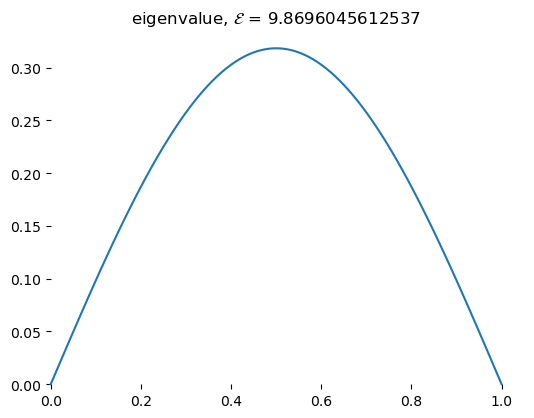

In [10]:
# Solve the Schrodinger equation for an infinite potential well.
#
# This is then just (in dimensionless coordinates):
#
# Psi'' = E Psi
#
# on xi = [0, 1]
#
# Here E is the energy eigenvalue.
#
# We have boundary conditions: Psi(0) = Psi(1) = 0
#
# We are free to pick Psi'(0) -- it only affects the normalization
# so we'll choose Psi'(0) = 1
#
# We solve this via shooting, integrating from the left and
# adjusting E to get the correct boundary at the right.
#
# The analytic solution for this has eigenvalues: E = (n pi)**2
#
# We'll define phi = psi'

from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

def rhs(xi, y, E):
    """ our RHS function """

    psi = y[0]
    phi = y[1]

    return np.array([phi, -E*psi])

def integrate(y0, E, nsteps, a=0, b=1):
    """ integrate our system from xi = a to xi = b,
    with the choice of the eigenvalue = E using RK4
    with even steps, nsteps total """

    dxi = (b-a)/float(nsteps)

    y = y0

    xi_store = [a]
    psi_store = [y0[0]]

    for n in range(nsteps):
        xi = a + float(n)*dxi
        xihalf = a + float(n + 1./2.)*dxi
        xinew = a + float(n + 1.0)*dxi

        # RK4
        k1 = rhs(xi, y, E)
        k2 = rhs(xihalf, y + 0.5*dxi*k1, E)
        k3 = rhs(xihalf, y + 0.5*dxi*k2, E)
        k4 = rhs(xinew, y + dxi*k3, E)

        ynew = y + (dxi/6.0)*(k1 + 2.0*k2 + 2.0*k3 + k4)

        y = ynew

        xi_store.append(xinew)
        psi_store.append(y[0])

    return y, xi_store, psi_store


# initial conditions: y = [psi, phi]
y0 = np.array([0.0, 1.0])
nsteps = 100


# let's just plot psi(E)(xi=1) -- this will show us all the values
# and the zeros of this function will be the eigenvalues
Ev = np.linspace(0.0, 1000, 1000)

f = []
for e in Ev:
    yy = integrate(y0, e, nsteps)
    f.append(yy[0])

plt.plot(Ev, f)

ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.spines['left'].set_bounds(True)
ax.spines['bottom'].set_bounds(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.xlabel(r"$\mathcal{E}$")
plt.ylabel(r"$\psi^{(\mathcal{E})}(\xi=1)$")

plt.savefig("infinite-well-f.png")



# do a secant iteration over our BVP varying the eigenvalue

# this choice gets the first eigenvalue
# E_old = 1.0
# E_new = 2.0

# this choice gets the second eigenvalue
E_old = 30
E_new = 40

# this choice gets the third eigenvalue
#E_old = 100
#E_new = 110


tol = 1.e-6
dE = 1.e10

y_old, _, _ = integrate(y0, E_old, nsteps)
while np.abs(dE) > tol:
    y_new, xi_s, psi_s = integrate(y0, E_new, nsteps)

    dfdE = (y_new[0] - y_old[0])/(E_new - E_old)
    dE = -y_new[0]/dfdE

    E_old = E_new
    y_old = y_new

    E_new += dE


print("eigenvalue is E = {}".format(E_new))

plt.clf()
plt.plot(xi_s, psi_s)
plt.xlabel(r"$\xi$")
plt.ylabel(r"$\psi$")
plt.title(r"eigenvalue, $\mathcal{{E}}$ = {}".format(E_new))

ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.spines['left'].set_bounds(True)
ax.spines['bottom'].set_bounds(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ep = "{:6.2f}".format(E_new)
plt.savefig("infinite-well-psi-E{}.png".format(ep.strip()))



## 泊松方程

sum of RHS:  2.9103830456733704e-11
64 0.0019712050945891423


/var/folders/5s/wns82wy141j71xrd3c066zzh0000gn/T/ipykernel_18076/2954999918.py:80: RuntimeWarning: divide by zero encountered in divide
  F = 0.5*F*dx*dx/(np.cos(2.0*np.pi*kx2d/Nx) +
/var/folders/5s/wns82wy141j71xrd3c066zzh0000gn/T/ipykernel_18076/2954999918.py:80: RuntimeWarning: invalid value encountered in divide
  F = 0.5*F*dx*dx/(np.cos(2.0*np.pi*kx2d/Nx) +


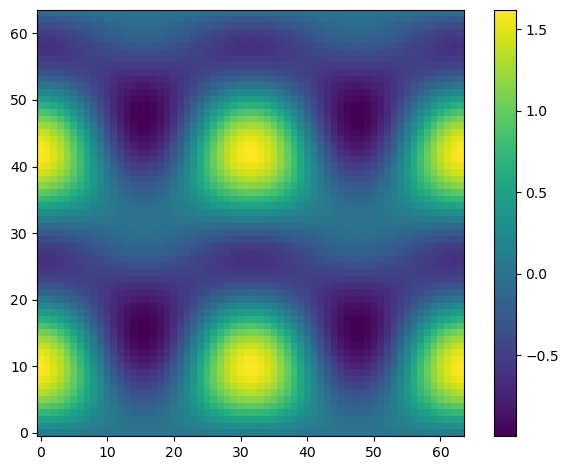

In [19]:
# solve a 2-d Poisson equation by differentiating the discretized Poisson
# equation and then substituting in the inverse Fourier transform and solving
# for the amplitudes in Fourier space.
#
# This is the way that Garcia and NR do it.
#
# Note: we need a periodic problem for an FFT

from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np

# the analytic solution
def true(x,y):
    pi = np.pi
    return np.sin(2.0*pi*x)**2*np.cos(4.0*pi*y) + \
        np.sin(4.0*pi*x)*np.cos(2.0*pi*y)**2


# the righthand side
def frhs(x,y):
    pi = np.pi
    return 8.0*pi**2*np.cos(4.0*pi*y)*(np.cos(4.0*pi*x) - 
                                          np.sin(4.0*pi*x)) - \
           16.0*pi**2*(np.sin(4.0*pi*x)*np.cos(2.0*pi*y)**2 + 
                       np.sin(2.0*pi*x)**2 * np.cos(4.0*pi*y))



def fft_solve(N):

    Nx = Ny = N

    # create the domain
    xmin = 0.0
    xmax = 1.0

    ymin = 0.0
    ymax = 1.0

    dx = (xmax - xmin)/Nx
    dy = (ymax - ymin)/Ny

    x = (np.arange(Nx) + 0.5)*dx
    y = (np.arange(Ny) + 0.5)*dy

    x2d = np.repeat(x, Ny)
    x2d.shape = (Nx, Ny)

    y2d = np.repeat(y, Nx)
    y2d.shape = (Ny, Nx)
    y2d = np.transpose(y2d)

    # create the RHS
    f = frhs(x2d, y2d)

    # compatibility conditions require that the RHS sum to zero
    print("sum of RHS: ", np.sum(f))

    # FFT of RHS
    F = np.fft.fft2(f)

    # get the wavenumbers -- we need these to be physical, so multiply by Nx
    kx = Nx*np.fft.fftfreq(Nx)
    ky = Ny*np.fft.fftfreq(Ny)

    # make 2-d arrays for the wavenumbers
    kx2d = np.repeat(kx, Ny)
    kx2d.shape = (Nx, Ny)

    ky2d = np.repeat(ky, Nx)
    ky2d.shape = (Ny, Nx)
    ky2d = np.transpose(ky2d)

    # here the FFT frequencies are in the order 0 ... N/2-1, -N/2, ...
    # the 0 component is not a physical frequency, but rather it is the DC
    # signal.  Don't mess with it, since we'll divide by zero
    oldDC = F[0,0]
    F = 0.5*F*dx*dx/(np.cos(2.0*np.pi*kx2d/Nx) + 
                     np.cos(2.0*np.pi*ky2d/Ny) - 2.0)# + 1.e-20)

    F[0,0] = oldDC

    # transform back to real space
    fsolution = np.real(np.fft.ifft2(F))

    return fsolution, np.sqrt(dx*dx*np.sum( ( (fsolution - true(x2d,y2d))**2).flat))


if __name__ == "__main__":

    N = 64

    fsolution, err = fft_solve(N)

    plt.imshow(fsolution, origin="lower", interpolation="nearest")
    plt.colorbar()

    plt.tight_layout()

    #plt.savefig("EM/EM-beamer/figs/poissonFFT.svg")

    print(N, err)




In [13]:
# A lot of this follows from Pang s 4.9, but they use the Numerov
# algorithm (and sort of skirt around the issue of how to start the
# multistep integration off).
#
# Landau and Paez Ch. 10 also gives some insight -- they explicitly
# seek the symmetric solutions.
#

from __future__ import print_function

import numpy as np


class Schrodinger(object):
    """ 
    A class to solve the time-independent Schrodinger equation for
    a general potential well.  This takes a potential function,
    V(x), and integrates (shoots) from the left and right (starting 
    at x_far >> 0) and meets at a matching point, x_match, where 
    the logarithmic derivative is matched (dpsi/dx/psi).  

    Odd and even wavefunctions are supported by making sure that
    the sign of psi matches at the matching point.

    Note: we assume that V(x) is symmetric here.

    references: Pang, section 4.9
                Landay and Paez, Ch. 10

    (although, note: those use the Numerov algorithm, we 
     use RK4 here)

    """

    def __init__(self, V, x_match=0.5, x_far=10, nsteps=100, tol=1.e-6):
        self.V = V
        self.x_match = x_match
        self.x_far = x_far
        self.nsteps = nsteps
        self.tol = tol

        # grids
        self.xi_left = np.linspace(-x_far, x_match, nsteps+1)
        self.xi_right = np.linspace(x_far, x_match, nsteps+1)

    def rhs(self, xi, y, E):
        """ our RHS function """
        psi, phi = y
        return np.array([phi, (self.V(xi)-E)*psi])

    def integrate(self, y0, E, side="left"):
        """ integrate our system from xi = a to xi = b,
            with the choice of the eigenvalue = E using RK4
            with even steps, nsteps total """

        if side == "left":
            xi_s = self.xi_left
        else:
            xi_s = self.xi_right

        psi_s = [y0[0]]

        y = y0

        for n in range(self.nsteps):
            xi = xi_s[n]
            xihalf = 0.5*(xi_s[n] + xi_s[n+1])
            xinew = xi_s[n+1]

            dxi = xinew - xi

            # RK4
            k1 = self.rhs(xi, y, E)
            k2 = self.rhs(xihalf, y + 0.5*dxi*k1, E)
            k3 = self.rhs(xihalf, y + 0.5*dxi*k2, E)
            k4 = self.rhs(xinew, y + dxi*k3, E)

            ynew = y + (dxi/6.0)*(k1 + 2.0*k2 + 2.0*k3 + k4)

            y = ynew

            psi_s.append(y[0])

        return np.array(y), np.array(xi_s), np.array(psi_s)

    def match(self, E):
        """ integrate from -x0 to 0 and from +x0 to 0, and meet in the middle
            and return the discrepancy in the log derivative there -- that is
            what we will zero. """

        # note: we are assuming a symmetric potential here
        beta = np.sqrt(self.V(self.x_far) - E)

        # boundary conditions [psi, phi]
        y0_left = [np.exp(-beta*self.x_far), beta*np.exp(-beta*self.x_far)]
        y0_right = [np.exp(-beta*self.x_far), -beta*np.exp(-beta*self.x_far)]

        # left integration
        yl, xi_l, psi_l = self.integrate(y0_left, E, side="left")

        # right integration
        yr, xi_r, psi_r = self.integrate(y0_right, E, side="right")

        # note, the far solution was setup with even parity as |x| -> oo,
        # but we could have odd or even solutions, so we need to allow the
        # entire solution to flip.  We'll first make the right solution
        # have the same sign as the left (and apply the same sign change
        # to the derivative at the matching point), and then check our
        # continuity condition.  This also renormalizes, but since we
        # consider the log derivative, normalization cancels.
        f = yl[0]/yr[0]

        yr = f*yr
        psi_r = f*psi_r
    
        # put the solution together
        xi = np.concatenate((xi_l, xi_r[::-1]))
        psi = np.concatenate((psi_l, psi_r[::-1]))

        return yl[1]/yl[0] - yr[1]/yr[0], xi, psi

    def solve(self, E1, E2):
        """ do the secant iteration to find an eigenvalue/function """

        dE = 1.e10

        m_old, _, _ = self.match(E1)
        while np.abs(dE) > self.tol:
            m_new, xi_s, psi_s = self.match(E2)

            dmdE = (m_new - m_old)/(E2 - E1)
            dE = -m_new/dmdE

            E1 = E2
            m_old = m_new

            E2 += dE

        return E2, xi_s, psi_s


expected eigenvalues: 
0 -3.0
1 2.0
2 5.0
3 6.0
4 5.0
5 2.0
6 -3.0
7 -10.0
8 -19.0
9 -30.0
eigenvalue is E = 5.000000550561325


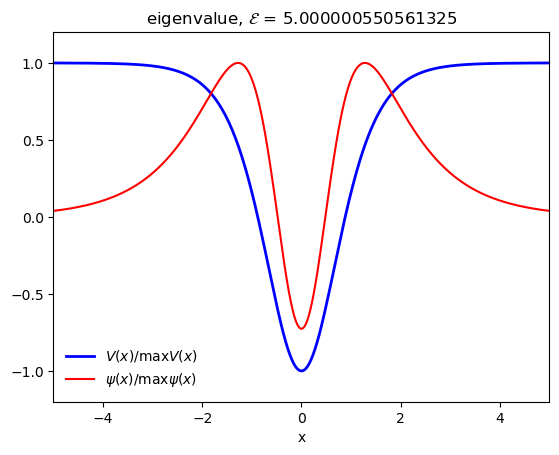

In [18]:
# The test potential here comes from Pang.
#
# This version seems to work for both odd and even parity solutions
# and looks like it reproduces the sample in Pang (note, we differ
# by a factor of 1/2 in our constants).

from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
import schrodinger

def V(x):
    """ the potential well """
    # this is Pang Eq. 4.97
    alpha = 1.0
    lambdac = 4.0

    return alpha**2*lambdac*(lambdac - 1.0)*(0.5 - 1.0/np.cosh(alpha*x)**2)


def Ev(n):
    """ the analytic form of the eigenvalues for our potential """
    # this is Pang Eq. 4.98
    alpha = 1.0
    lambdac = 4.0

    return alpha**2*(0.5*lambdac*(lambdac - 1.0) - (lambdac - 1.0 - n)**2)


# pick a starting point far from the action
x0 = 10.0
x_match = 1.0

nsteps = 500

s = schrodinger.Schrodinger(V, x_match=x_match, x_far=x0, nsteps=nsteps)


print("expected eigenvalues: ")
for n in range(10):
    print(n, Ev(n))


# gives E = -3 -- ground state
#E_old = -2.9
#E_new = -2.95

# gives E = 2 -- first excited state
#E_old = -2.3
#E_new = -2.5

# gives E = 5 -- second excited state
E_old = 4.9
E_new = 4.95

# the next eigenvalue by the analytic expression is E = 6, but this
# is the top of the potential well, so this is not a bound state


E, xi_s, psi_s = s.solve(E_old, E_new)

print("eigenvalue is E = {}".format(E))

Vs = V(xi_s)

plt.clf()

plt.plot(xi_s, Vs/max(np.abs(Vs)), color="b", lw=2, label=r"$V(x)/\max{V(x)}$")
plt.plot(xi_s, psi_s/max(np.abs(psi_s)), color="r", label=r"$\psi(x)/\max{\psi(x)}$")

plt.xlabel("x")

plt.title(r"eigenvalue, $\mathcal{{E}}$ = {}".format(E))

plt.xlim(-0.5*x0, 0.5*x0)

plt.ylim(-1.2, 1.2)

plt.legend(frameon=False, loc="best")

ep = "{:6.2f}".format(E)
# plt.savefig("EM/EM-beamer/figs/complex-well-psi-E{}.png".format(ep.strip()))



(9.992007221626409e-16+0j)


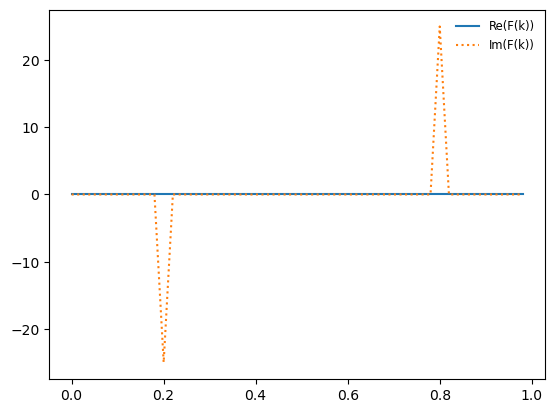

In [20]:
from __future__ import print_function

import math
import numpy as np
import matplotlib.pyplot as plt


def dft(f_n):
    """ perform a discrete Fourier transform.  We use the same
        conventions as NumPy's FFT"""
    
    N = len(f_n)

    # allocate space for the frequency components -- they are, in general,
    # complex
    f_k = np.zeros( (N), dtype=np.complex128)

    for k in range(N):        
        # create f_k by looping over all the f_n real-space data points
        # this will create a complex number 

        for n in range(N):
            f_k[k] += f_n[n]*np.exp(-2.0*math.pi*1j*n*k/N)

    return f_k


npts = 50

f_0 = 0.2

xmax = 50.0
xx = np.linspace(0.0, xmax, npts, endpoint=False)

f_n = np.sin(2.0*math.pi*f_0*xx)

f_k = dft(f_n)

print(f_k[0])

# compute k
k = np.arange(npts)/xmax

plt.plot(k, f_k.real, label="Re(F(k))")
plt.plot(k, f_k.imag, ls=":", label="Im(F(k))")
plt.legend(frameon=False, fontsize="small")
plt.savefig("dft.png")


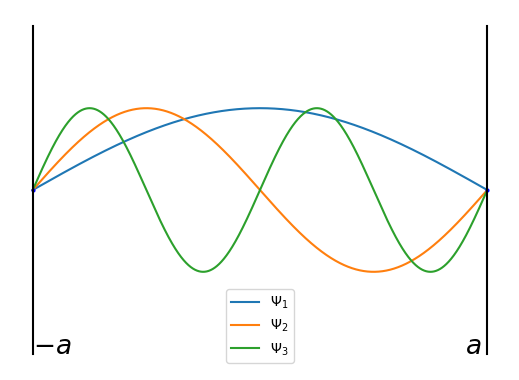

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,4.5))
ax = fig.add_axes([0.0, 0.0, 1, 0.8])
ax.set_xticks([])
ax.set_yticks([])
ax.spines[:].set_visible(False)
a=2
PI=3.14159
x = np.arange(- 2, 2, 0.001)
n=1
y= np.sin(3.14159/4*(x+a))
plt.plot(x,np.sin(3.14159/4*(x+a)),label=r"$\Psi_1$")
plt.plot(x, np.sin(3.14159/2*(x+a)),label=r"$\Psi_2$")
plt.plot(x,np.sin(3.14159*(x+a)),label=r"$\Psi_3$")

plt.plot(-2,0, 'b', marker = "o",markersize=2)
ax.text(-2,-2, r"$-a$", fontsize=19);
plt.plot(2,0, 'b', marker = "o",markersize=2)
ax.text(1.8,-2, r"$a$", fontsize=19);

plt.plot([-2,-2],[-2,2],'black' )
plt.plot([2,2],[-2,2],'black' )


plt.legend()
#plt.savefig("EM/EM-beamer/figs/square-potential-well-wavs.svg")

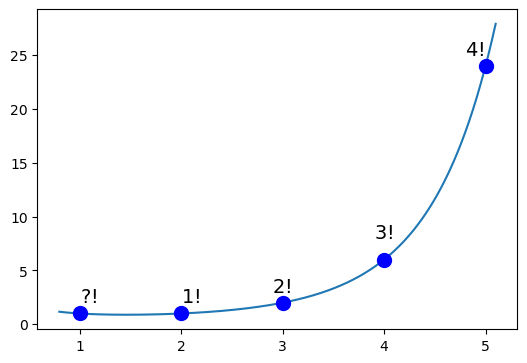

In [14]:
from scipy.special import gamma

x = np.arange(0.8, 5.1, 0.001)

fig = plt.figure(figsize=(6,4), dpi=100)
axes = fig.add_axes([0.0, 0.0, 0.8, 0.8]) 
axes.plot(x,gamma(x))
plt.plot(1, gamma(1), 'b', marker = "o",markersize=10)
axes.text(1,gamma(1)+1, r"$?$!", fontsize=14);
plt.plot(2, gamma(2), 'b', marker = "o",markersize=10)
axes.text(2,gamma(2)+1, r"$1$!", fontsize=14);
plt.plot(3, gamma(3), 'b', marker = "o",markersize=10)
axes.text(2.9,gamma(3)+1, r"$2$!", fontsize=14);
plt.plot(4, gamma(4), 'b', marker = "o",markersize=10)
axes.text(3.9,gamma(4)+2, r"$3$!", fontsize=14);
plt.plot(5, gamma(5), 'b', marker = "o",markersize=10)
axes.text(4.8,gamma(5)+1, r"$4$!", fontsize=14);
plt.show()
#fig.savefig("EM/EM-beamer/figs/gamma-1.svg")


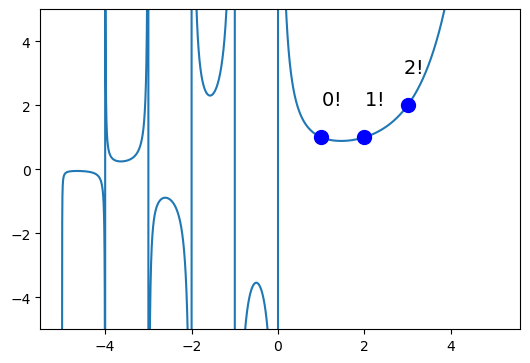

In [17]:
from scipy.special import gamma

x = np.arange(-5, 5.1, 0.001)

fig = plt.figure(figsize=(6,4), dpi=100)
axes = fig.add_axes([0.0, 0.0, 0.8, 0.8]) 
axes.plot(x,gamma(x))
plt.plot(1, gamma(1), 'b', marker = "o",markersize=10)
axes.text(1,gamma(1)+1, r"$0$!", fontsize=14);
plt.plot(2, gamma(2), 'b', marker = "o",markersize=10)
axes.text(2,gamma(2)+1, r"$1$!", fontsize=14);
plt.plot(3, gamma(3), 'b', marker = "o",markersize=10)
axes.text(2.9,gamma(3)+1, r"$2$!", fontsize=14);
plt.plot(4, gamma(4), 'b', marker = "o",markersize=10)
plt.plot(5, gamma(5), 'b', marker = "o",markersize=10)
plt.ylim(-5, 5)
plt.show()
fig.savefig("EM/EM-beamer/figs/gamma-2.svg")